In [1]:
import pandas as pd
import numpy as np
from utils.data_process import input_process, res_process
from utils.search import return_res
from utils.plot import plotly_plot
from utils.algo.calculation import *
from datetime import date
from os import walk
import re
from sklearn.preprocessing import *
import matplotlib.pyplot as plt

In [10]:
# 讀入資料(好範例)
Ticker = '2317TW'
start_date = "2014-12-05"
end_date = "2015-01-12"
df = pd.read_csv(r"./data/{}.csv".format(Ticker))
s, e = input_process.DateIndexMap(df, start_date), input_process.DateIndexMap(df, end_date)

In [3]:
# # 不好範例
# Ticker = '2330TW'
# # start_date = "2014-12-05"
# # end_date = "2015-01-12"
# df = pd.read_csv(r"./data/{}.csv".format(Ticker))
# # s, e = input_process.DateIndexMap(df, start_date), input_process.DateIndexMap(df, end_date)
# s = 1604
# e = 1628

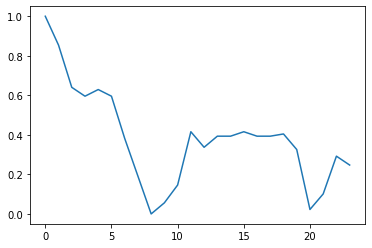

In [11]:
# 資料作圖
y = input_process.batch_scalar.min_max_scalar(np.array(df['Close'][s:e]))
x = np.array([i for i in range(len(y))])
plt.plot(x,y)

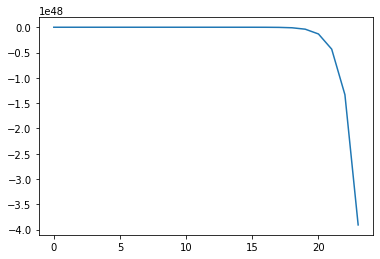

In [12]:
# fit多項式
p = np.polynomial.legendre.Legendre(poly2on(arr2poly_coef(y)))
y_pred = np.array([p(i) for i in x]) # 帶入轉換後多項式
plt.plot(x, y_pred) # 作圖檢視結果

In [13]:
# 執行搜尋
# search and return res
search_res = return_res.get_sim_res(df, s, e, 'polycos_d') # a:b
    

# get res start and end
s_res, e_res = res_process.range_2_num(search_res)

100%|██████████| 3552/3552 [00:53<00:00, 66.42it/s]

polycos_d


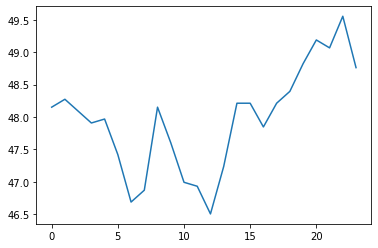

In [16]:
plt.plot(x,df['Close'][s_res:e_res])

In [15]:
# 執行搜尋
# search and return res
search_res = return_res.get_sim_res(df, s, e, 'poly_d') # a:b
    

# get res start and end
s_res, e_res = res_process.range_2_num(search_res)

100%|██████████| 3552/3552 [00:55<00:00, 64.04it/s]


poly_d


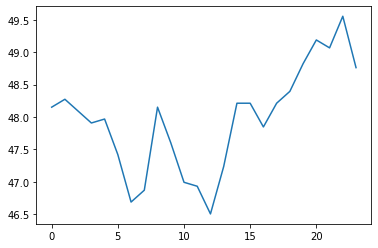

In [17]:
plt.plot(x,df['Close'][s_res:e_res])